check plclc bbox data

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
from chainercv.visualizations import vis_bbox
from chainercv.utils import bbox_iou
from imageio import imread
import numpy as np

/home/mayu-ot/miniconda3/envs/py36chainer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from func.datasets.datasets import PLCLCBBoxDataset, BBoxDataset

In [4]:
data = PLCLCBBoxDataset('test')
gt_data = BBoxDataset('test')

(2378356400, 'a woman')


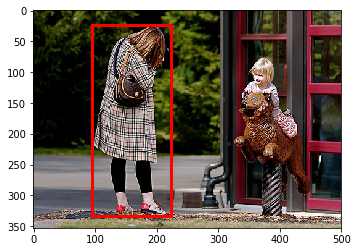

In [7]:
i = np.random.randint(0, len(data))
im, gt_roi = gt_data[i]
label = gt_data.df.iloc[i].name
print(label)
vis_bbox(im.transpose(2, 0, 1), [gt_roi])

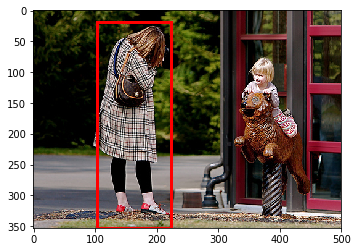

In [8]:
roi = data.df.loc[label][['ymin', 'xmin', 'ymax', 'xmax']]
vis_bbox(im.transpose(2, 0, 1), [roi])

In [9]:
ious = []
for i in range(len(data)):
    label = data.df.iloc[i].name
    try:
        roi = data.df.loc[label][['ymin', 'xmin', 'ymax', 'xmax']].values
        gt_roi = gt_data.df.loc[label][['ymin', 'xmin', 'ymax', 'xmax']].values
        ious.append(bbox_iou(roi[None, :], gt_roi[None, :]))
    except:
        pass

(array([1083.,  192.,  214.,  180.,  180.,  174.,  170.,  160.,  138.,
         178.,  143.,  154.,  161.,  149.,  179.,  161.,  168.,  166.,
         194.,  185.,  218.,  211.,  194.,  199.,  192.,  224.,  240.,
         263.,  265.,  273.,  266.,  291.,  268.,  312.,  298.,  307.,
         280.,  331.,  293.,  300.,  284.,  304.,  303.,  301.,  239.,
         195.,  144.,   97.,   82.,   57.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <a list of 50 Patch objects>)

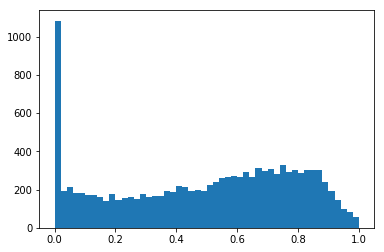

In [11]:
plt.hist(np.asarray(ious).ravel().astype('f'), bins=50)

In [12]:
l = (np.asarray(ious).ravel() > .5)
l.sum() / l.size

0.53780276816609